## 1. Setup and get Data

### 1.1 Install Dependencies

In [3]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached albumentations-1.3.0-py3-none-any.whl (123 kB)
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Using cached scikit_image-0.20.0-cp39-cp39-win_amd64.whl (23.9 MB)
  Using cached opencv_python_headless-4.7.0.72-cp37-abi3-win_amd64.whl (38.1 MB)
  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Using cached tifffile-2023.4.12-py3-none-any.whl (219 kB)
  Using cached imageio-2.27.0-py3-none-any.whl (3.4 MB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached lazy_loader-0.2-py3-none-any.whl (8.6 kB)
  Using cached PyWavelets-1.4.1-cp39-cp39-win_amd64.whl (4.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

scikit-image 0.20.0 requires scipy<1.9.2,>=1.8; python_version <= "3.9", but you'll have scipy 1.10.1 which is incompatible.
You should consider upgrading via the 'd:\development projects\deep_learning_projects\deep-face-detection\facedetection\scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
!pip install scipy==1.9.0

  Using cached scipy-1.9.0-cp39-cp39-win_amd64.whl (38.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


You should consider upgrading via the 'd:\development projects\deep_learning_projects\deep-face-detection\facedetection\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
!pip list

Package                      Version
---------------------------- -----------
-pencv-python                4.7.0.72
absl-py                      1.4.0
albumentations               1.3.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.3.3
fonttools                    4.39.3
gast                         0.4.0
google-auth                  2.17.3
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.54.0
h5py                         3.8.0
idna                         3.4
imageio                      2.27.0
i

You should consider upgrading via the 'd:\development projects\deep_learning_projects\deep-face-detection\facedetection\scripts\python.exe -m pip install --upgrade pip' command.


In [34]:
!pip uninstall opencv-python --yes

^C


You should consider upgrading via the 'd:\development projects\deep_learning_projects\deep-face-detection\facedetection\scripts\python.exe -m pip install --upgrade pip' command.
ERROR: Exception:
Traceback (most recent call last):
  File "d:\development projects\deep_learning_projects\deep-face-detection\facedetection\lib\site-packages\pip\_internal\cli\base_command.py", line 228, in _main
    status = self.run(options, args)
  File "d:\development projects\deep_learning_projects\deep-face-detection\facedetection\lib\site-packages\pip\_internal\commands\uninstall.py", line 93, in run
    uninstall_pathset.commit()
  File "d:\development projects\deep_learning_projects\deep-face-detection\facedetection\lib\site-packages\pip\_internal\req\req_uninstall.py", line 450, in commit
    self._moved_paths.commit()
  File "d:\development projects\deep_learning_projects\deep-face-detection\facedetection\lib\site-packages\pip\_internal\req\req_uninstall.py", line 290, in commit
    save_dir.cleanu

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Successfully uninstalled opencv-python-4.7.0.72


### 1.2 Collect Images using opencv

In [2]:
import os
import time
import uuid
import cv2

In [2]:
uuid.uuid1()

UUID('9501fd71-e257-11ed-890a-c03eba2c2834')

In [3]:
IMAGES_PATH = os.path.join('data','images')
number_images = 10

In [10]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### 1.3 Annotate images with LableMe

In [1]:
!labelme

## 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [12]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.1. Limit GPU Memory Growth

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

### 2.3 Load Image into TF Data Pipeline

In [7]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle=False)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data\\images\\*.jpg'

In [ ]:
images.as_numpy_iterator().next()

In [34]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
images = images.map(load_image)

In [13]:
images.as_numpy_iterator().next()

array([[[178, 193, 174],
        [178, 193, 174],
        [178, 193, 174],
        ...,
        [ 27,  48,  67],
        [ 34,  53,  70],
        [ 37,  56,  71]],

       [[177, 192, 173],
        [175, 192, 173],
        [178, 193, 174],
        ...,
        [ 28,  46,  66],
        [ 31,  50,  67],
        [ 34,  51,  67]],

       [[176, 193, 174],
        [175, 194, 174],
        [176, 193, 174],
        ...,
        [ 28,  45,  63],
        [ 30,  46,  62],
        [ 29,  45,  60]],

       ...,

       [[ 62,  62,  70],
        [ 65,  65,  75],
        [ 67,  66,  82],
        ...,
        [  5,   6,  62],
        [ 10,   9,  67],
        [ 11,  11,  71]],

       [[ 60,  64,  67],
        [ 63,  66,  71],
        [ 68,  68,  78],
        ...,
        [  2,   5,  58],
        [  4,   5,  61],
        [  3,   5,  62]],

       [[ 60,  64,  65],
        [ 63,  67,  70],
        [ 69,  70,  75],
        ...,
        [  7,  10,  61],
        [  5,   8,  63],
        [  3,   5,  62]]

In [14]:
type(images)


tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib

In [15]:
image_generator = images.batch(4).as_numpy_iterator()

In [18]:
plot_images = image_generator.next()

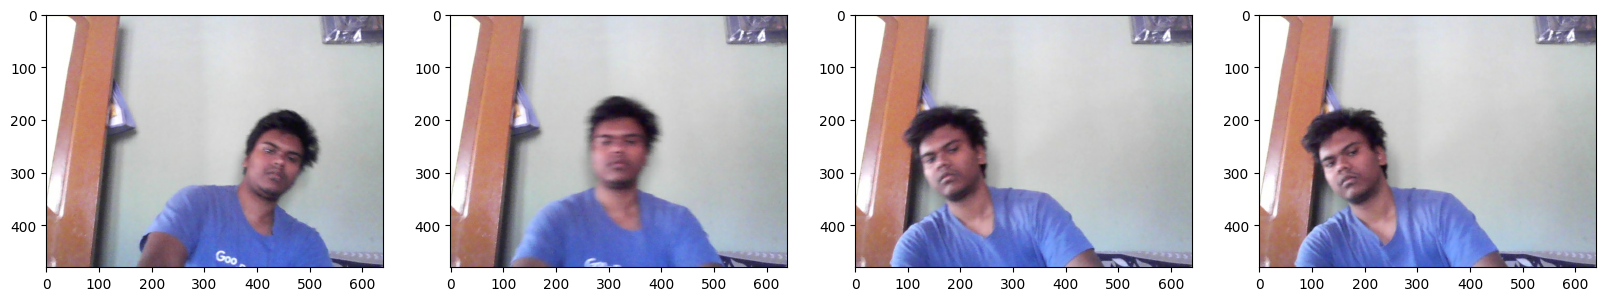

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

## 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [2]:
93*.7 # 65 images to train

65.1

In [3]:
93*.15 # 14 & 14 images to test and val

13.95

### 3.2 Move the Matching Labels

In [8]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)   

## 4. Apply Image Augmentation on Images and Labels using Albumentations

In [5]:
img = cv2.imread(os.path.join('data','train','images','3a0f9625-e18e-11ed-8ea7-c03eba2c2834.jpg'))

In [6]:
img.shape

(480, 640, 3)

### 4.1 Setup Albumentations Transform Pipeline

In [8]:
import albumentations as alb

In [9]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [10]:
img = cv2.imread(os.path.join('data','train','images','3a0f9625-e18e-11ed-8ea7-c03eba2c2834.jpg'))

In [13]:
with open(os.path.join('data', 'train', 'labels', '3a0f9625-e18e-11ed-8ea7-c03eba2c2834.json'), 'r') as f:
    label = json.load(f)

In [18]:
label['shapes'][0]['points']

[[118.30917874396137, 148.69565217391303],
 [295.6038647342995, 353.04347826086956]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

#### Transforming the coordinates from pascle_voc to albumentations format, basically scalling down by dividing with the height and width of the image, checkout albumentations docs

In [20]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [21]:
coords

[118.30917874396137, 148.69565217391303, 295.6038647342995, 353.04347826086956]

In [22]:
coords = list(np.divide(coords, [640,480,640,480]))

In [23]:
coords

[0.18485809178743964,
 0.30978260869565216,
 0.461881038647343,
 0.7355072463768116]

### 4.4 Apply Augmentations and View Results

In [24]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [30]:
augmented['bboxes']

[(0.09846484165324748,
  0.28376811594202894,
  0.4924530327428878,
  0.7378743961352657)]

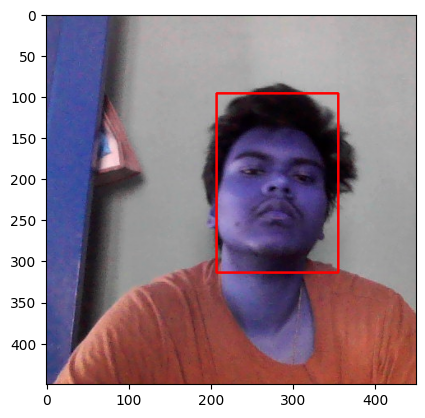

In [55]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

## 5. Build and Run Augmentation Pipeline
### 5.1 Run Augmentation Pipeline

In [32]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

### 5.2 Load Augmented Images to Tensorflow Dataset

In [56]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [57]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [58]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [59]:
train_images.as_numpy_iterator().next()

array([[[0.21041666, 0.3636642 , 0.7584559 ],
        [0.16979167, 0.37273285, 0.705576  ],
        [0.08069853, 0.25716913, 0.61403185],
        ...,
        [0.01764706, 0.18057598, 0.5860907 ],
        [0.02028186, 0.18412991, 0.6308824 ],
        [0.02843137, 0.19313726, 0.64117646]],

       [[0.2007353 , 0.4139706 , 0.7909926 ],
        [0.12965687, 0.34871325, 0.72175246],
        [0.0692402 , 0.25110295, 0.6261029 ],
        ...,
        [0.03137255, 0.18866421, 0.62267154],
        [0.02052696, 0.18915442, 0.6382353 ],
        [0.01734069, 0.19920343, 0.64393383]],

       [[0.22444853, 0.42352942, 0.76096815],
        [0.12101716, 0.3482843 , 0.7400122 ],
        [0.10251226, 0.3216299 , 0.6863358 ],
        ...,
        [0.03137255, 0.19515932, 0.59797794],
        [0.02089461, 0.19601716, 0.6022059 ],
        [0.01507353, 0.18713236, 0.61360294]],

       ...,

       [[0.3009804 , 0.23952205, 0.27518383],
        [0.3098652 , 0.25441176, 0.25012255],
        [0.28921568, 0

## 6. Prepare Labels
### 6.1 Build Label Loading Function

In [60]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [61]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [62]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [63]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [64]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8), array([0.134, 0.271, 0.528, 0.725], dtype=float16))

## 7. Combine Label and Image Samples
### 7.1 Check Partition Lengths

In [65]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3900, 3900, 840, 840, 840, 840)

### 7.2 Create Final Datasets (Images/Labels)

In [66]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [67]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [68]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [71]:
train.as_numpy_iterator().next()[1]

(array([[0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.     , 0.     , 0.     , 0.     ],
        [0.3013 , 0.09845, 0.7803 , 0.75   ],
        [0.6816 , 0.2067 , 1.     , 0.651  ],
        [0.2417 , 0.2173 , 0.7046 , 0.7593 ],
        [0.4358 , 0.2168 , 0.7866 , 0.719  ],
        [0.4077 , 0.1744 , 0.7954 , 0.679  ],
        [0.01221, 0.1641 , 0.3687 , 0.733  ],
        [0.1731 , 0.1936 , 0.5337 , 0.728  ]], dtype=float16))

### 7.3 View Images and Annotations

In [77]:
data_samples = train.as_numpy_iterator()

In [78]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


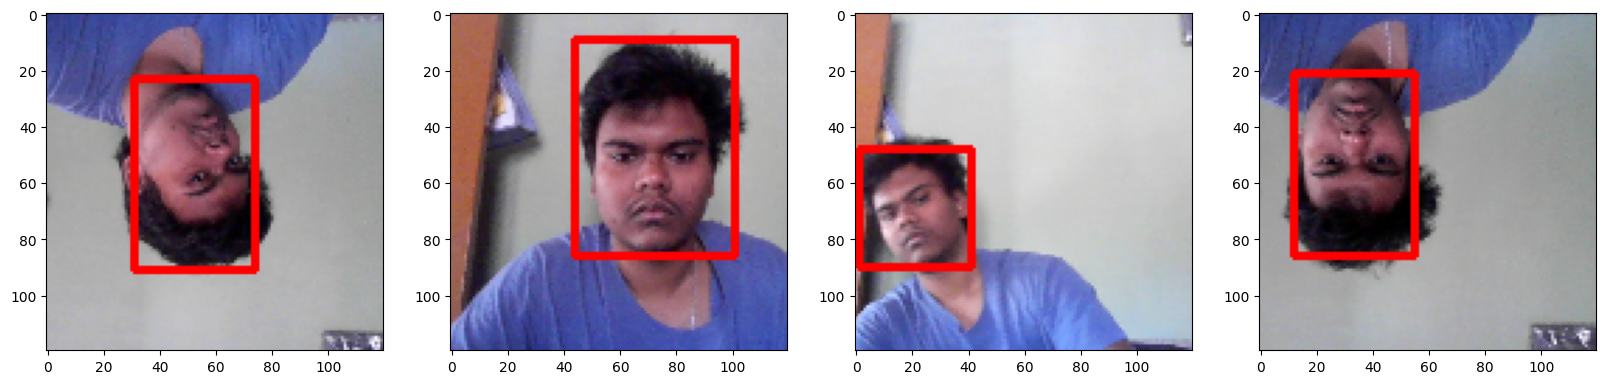

In [79]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

## 8. Build Deep Learning using the Functional API
### 8.1 Import Layers and Base Network

In [80]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [81]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 7s 0us/step


In [82]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### 8.3 Build instance of Network

In [ ]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker